# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | Converts each categorical column into a separate binary column. |
| **Feature selection*** | The idea of selecting the relevant features that would restrict our model to just the most important variables. |
| **Classifier** | A model that assigns inputs to categories instead of predicting numeric values (e.g. classification tree). |
| **Precision** | (# of true positives) / (# of true positives + # of false positives)  |
| **Recall** | (# of true positives) / (# of true positives + # false negatives) |
| **F1 Score** | 2 * (precision * recall) / (precision + recall) |
| **Parsimonious model** | A model that is simple as possible while still explaining the data well. |
| **Ridge regression** | A regression model where we add a penalty term Bj^2 multiplied by some constant to the loss function (which we are minimizing). So, if Bj starts to get too big, then it would penalize the objective function. |
| **LASSO regression** | Similar to the ridge regression model, but instead of Bj^2 we add the total sum of all the absolute values of Bj from j = 1 to n multiplied by some constant to the loss function that we are minimizing. This forces the coefficients to 0 one at a time instead of constraining the total coefficient sum.  |
| **Cross validation** | We split the dataset into k groups, and for each unique group: make it a test or hold-out set, and following that, we take the remaining groups as training sets, and finally fit on the training set and evaluate on the test set. For each held out fold, we use many of the same data points to calculate the model; thus, we expect the results to depend more on the smaller folds with less points. |
| **Tree based methods** | Given independent variables and a dependent variable, we use a series of questions about the independent variables to separate the dataset into more manageable pieces. |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) The shape would be a rectangle if it was a perfect classifier. A bad classifier would look like the line y=x.                  

b) If the F1 score is close to 1, that means that the precision and recall are close to 1, which then means that the number of false positives and false negatives have to be close to 0, indicating that the model is doing really good. If the F1 score is close to 0, that means the number of true positives are close to 0, which means the model is doing bad. 

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Straight line | S-shaped curve |
| **Dependent Variable Type** | Numerical | Categorical |
| **Purpose** (regression or classification) | Predicts numerical  values | Predicts probabilities and uses those to classify inputs into categories |
| **Range of output variable** ($y_i$ or $p_i$) | Negative infinity to positive infinity | 0 to 1 |
| **Method*** | Ordinary least squares | Maximum likelihood estimation |
| **Example of use** | Predicting height based off of weight and age | Predicing whether a penguin is a king or emperor penguin |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

We train the model so it can pick up on patterns in the data, then we test the model to make sure that it can pick up on those patterns on unknown or new data. Additionally, this is so the model isn't overfit and picks up on patterns that aren't really there or relevant. To do this, we can either split our original data in a 80-20 or 70-30 split (training-test) since we don't have new data that we can test on. Another way would be k-folds cross validation, where we split our data into a number of unique groups and then for each one of those groups we either make it a hold-out or test set, turning the rest into a training set. Then we, fit and evaluate and then summarize the model's effectiveness by looking at the sample of evaluation scores.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [6]:
library(tidyverse);
housing <- read_csv('housing.csv')
housing

Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


longitude latitude housing_median_age total_rooms population households
1     -122.23   37.88    41                  880         322        126      
2     -122.22   37.86    21                 7099        2401       1138      
3     -122.24   37.85    52                 1467         496        177      
4     -122.25   37.85    52                 1274         558        219      
5     -122.25   37.85    52                 1627         565        259      
6     -122.25   37.85    52                  919         413        193      
7     -122.25   37.84    52                 2535        1094        514      
8     -122.25   37.84    52                 3104        1157        647      
9     -122.26   37.84    42                 2555        1206        595      
10    -122.25   37.84    52                 3549        1551        714      
11    -122.26   37.85    52                 2202         910        402      
12    -122.26   37.85    52                 3503        1504        734      
13    -122.26   37.85    52                 2491        1098        468      
14    -122.26   37.84    52                  696         345        174      
15    -122.26   37.85    52                 2643        1212        620      
16    -122.26   37.85    50                 1120         697        264      
17    -122.27   37.85    52                 1966         793        331      
18    -122.27   37.85    52                 1228         648        303      
19    -122.26   37.84    50                 2239         990        419      
20    -122.27   37.84    52                 1503         690        275      
21    -122.27   37.85    40                  751         409        166      
22    -122.27   37.85    42                 1639         929        366      
23    -122.27   37.84    52                 2436        1015        478      
24    -122.27   37.84    52                 1688         853        325      
25    -122.27   37.84    52                 2224        1006        422      
26    -122.28   37.85    41                  535         317        119      
27    -122.28   37.85    49                 1130         607        239      
28    -122.28   37.85    52                 1898        1102        397      
29    -122.28   37.84    50                 2082        1131        473      
30    -122.28   37.84    52                  729         395        155      
⋮     ⋮         ⋮        ⋮                  ⋮           ⋮          ⋮         
20611 -121.56   39.10    28                  2130       1195        439      
20612 -121.55   39.10    27                  1783       1163        409      
20613 -121.56   39.08    26                  1377        761        267      
20614 -121.55   39.09    31                  1728       1167        384      
20615 -121.54   39.08    26                  2276       1455        474      
20616 -121.54   39.08    23                  1076        724        197      
20617 -121.53   39.08    15                  1810       1157        375      
20618 -121.53   39.06    20                   561        308        114      
20619 -121.55   39.06    25                  1332        726        226      
20620 -121.56   39.01    22                  1891       1023        296      
20621 -121.48   39.05    40                   198        151         48      
20622 -121.47   39.01    37                  1244        484        157      
20623 -121.44   39.00    20                   755        457        157      
20624 -121.37   39.03    32                  1158        598        227      
20625 -121.41   39.04    16                  1698        731        291      
20626 -121.52   39.12    37                   102         29         14      
20627 -121.43   39.18    36                  1124        504        171      
20628 -121.32   39.13     5                   358        169         59      
20629 -121.48   39.10    19                  2043       1018        390      
20630 -121.39   39.12    28 

Linear regression is appropriate because we have a numerical dependent variable, median_house_value, that we would like to predict based off of the other numerical features in the dataset that would reasonably seem to have some sort of impact on house value such as the number of rooms, location, house age, and etc. 

In [9]:
# b
set.seed(123)
scale <- function(x){
  (x - min(x)) / (max(x)-min(x))
}
housing_scaled <- housing %>% mutate(across(everything(), scale))
train <- runif(nrow(housing_scaled)) < 0.75
test <- !train
housing_scaled

longitude latitude  housing_median_age total_rooms population 
1     0.2111554 0.5674814 0.7843137          0.02233074  0.008940834
2     0.2121514 0.5653560 0.3921569          0.18050257  0.067210404
3     0.2101594 0.5642933 1.0000000          0.03726029  0.013817652
4     0.2091633 0.5642933 1.0000000          0.03235159  0.015555369
5     0.2091633 0.5642933 1.0000000          0.04132967  0.015751563
6     0.2091633 0.5642933 1.0000000          0.02332265  0.011491353
7     0.2091633 0.5632306 1.0000000          0.06442342  0.030578211
8     0.2091633 0.5632306 1.0000000          0.07889516  0.032343956
9     0.2081673 0.5632306 0.8039216          0.06493209  0.033717313
10    0.2091633 0.5632306 1.0000000          0.09021313  0.043386866
11    0.2081673 0.5642933 1.0000000          0.05595402  0.025421116
12    0.2081673 0.5642933 1.0000000          0.08904319  0.042069565
13    0.2081673 0.5642933 1.0000000          0.06330434  0.030690322
14    0.2081673 0.5632306 1.0000000          0.01765095  0.009585470
15    0.2081673 0.5642933 1.0000000          0.06717025  0.033885479
16    0.2081673 0.5642933 0.9607843          0.02843481  0.019451218
17    0.2071713 0.5642933 1.0000000          0.04995168  0.022141876
18    0.2071713 0.5642933 1.0000000          0.03118165  0.018077861
19    0.2081673 0.5632306 0.9607843          0.05689506  0.027663331
20    0.2071713 0.5632306 1.0000000          0.03817590  0.019255024
21    0.2071713 0.5642933 0.7647059          0.01904980  0.011379243
22    0.2071713 0.5642933 0.8039216          0.04163487  0.025953642
23    0.2071713 0.5632306 1.0000000          0.06190549  0.028364024
24    0.2071713 0.5632306 1.0000000          0.04288112  0.023823538
25    0.2071713 0.5632306 1.0000000          0.05651356  0.028111774
26    0.2061753 0.5642933 0.7843137          0.01355613  0.008800695
27    0.2061753 0.5642933 0.9411765          0.02868915  0.016928726
28    0.2061753 0.5642933 1.0000000          0.04822219  0.030802433
29    0.2061753 0.5632306 0.9607843          0.05290198  0.031615236
30    0.2061753 0.5632306 1.0000000          0.01849026  0.010986855
⋮     ⋮         ⋮         ⋮                  ⋮           ⋮          
20611 0.2778884 0.6971307 0.52941176         0.054122794 0.033409008
20612 0.2788845 0.6971307 0.50980392         0.045297319 0.032512122
20613 0.2778884 0.6950053 0.49019608         0.034971260 0.021244990
20614 0.2788845 0.6960680 0.58823529         0.043898469 0.032624233
20615 0.2798805 0.6950053 0.49019608         0.057836106 0.040696208
20616 0.2798805 0.6950053 0.43137255         0.027315733 0.020207965
20617 0.2808765 0.6950053 0.27450980         0.045984028 0.032343956
20618 0.2808765 0.6928799 0.37254902         0.014217407 0.008548446
20619 0.2788845 0.6928799 0.47058824         0.033826746 0.020264021
20620 0.2778884 0.6875664 0.41176471         0.048044153 0.028588245
20621 0.2858566 0.6918172 0.76470588         0.004984994 0.004148098
20622 0.2868526 0.6875664 0.70588235         0.031588585 0.013481320
20623 0.2898406 0.6865037 0.37254902         0.019151534 0.012724572
20624 0.2968127 0.6896918 0.60784314         0.029401292 0.016676476
20625 0.2928287 0.6907545 0.29411765         0.043135460 0.020404159
20626 0.2818725 0.6992561 0.70588235         0.002543364 0.000728720
20627 0.2908367 0.7056323 0.68627451         0.028536548 0.014041873
20628 0.3017928 0.7003188 0.07843137         0.009054377 0.004652597
20629 0.2858566 0.6971307 0.35294118         0.051910067 0.028448107
20630 0.2948207 0.6992561 0.52941176         0.255175746 0.193643320
20631 0.3017928 0.7173220 0.19607843         0.067093952 0.035146725
20632 0.2938247 0.7215728 0.27450980         0.067475457 0.033549147
20633 0.2888446 0.7141339 0.27450980         0.058929752 0.029260910
20634 0.2808765 0.7066950 0.50980392         0.052851111 0.030241879
20635 0.2778884 0.7151966 0.52941176         0.059260390 0.029092744
20636 0.3247012 0.7375133 0.47058824         0.042296149 0.023599316
2063

#### c) Fit the model.

In [10]:
v = median_house_value ~ longitude + latitude + housing_median_age + total_rooms + population + households + median_income
m <- lm(v, housing_scaled %>% filter(train))
summary(m)


Call:
lm(formula = v, data = housing_scaled %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

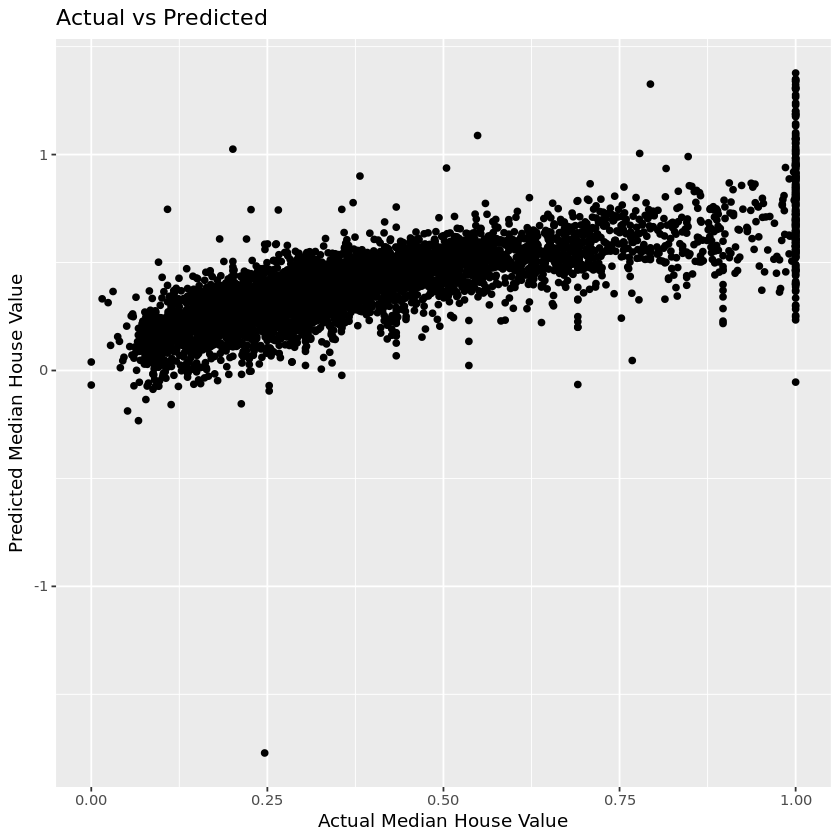

In [14]:
housing_test <- housing_scaled %>% filter(test);
housing_test <- housing_test %>% mutate(med_house_val_pred = predict(m, housing_test))
ggplot(housing_test, aes(x = median_house_value, y = med_house_val_pred)) +
  geom_point() + 
  labs(title = "Actual vs Predicted",
       x = "Actual Median House Value",
       y = "Predicted Median House Value")

#### e) Make a residuals plot.

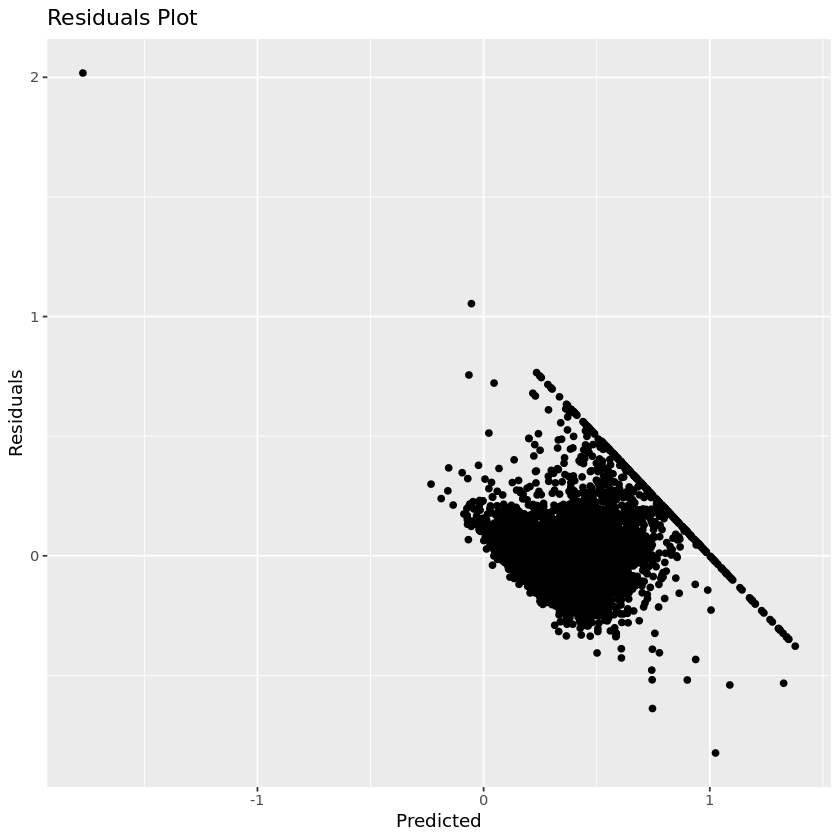

In [18]:
ggplot(housing_test, aes(x = med_house_val_pred, y = median_house_value - med_house_val_pred)) +
  geom_point() + 
  labs(title = "Residuals Plot", x = "Predicted", y = "Residuals")

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?
The outcome variable is binary, so logistic regression is appropriate. 

In [19]:
library(caret)
library(glmnet)
diabetes <- read_csv("diabetes.csv")
summary(diabetes)

ERROR: Error in library(caret): there is no package called ‘caret’


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [7]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

diabetes_scaled <- diabetes %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
n <- nrow(diabetes_scaled)
train_idx <- sample.int(n, size = floor(0.1 * n))
d_train <- diabetes_scaled %>% slice(train_idx)
d_test  <- diabetes_scaled %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv")
d_test  %>% write_csv("diabetes_test.csv")

#### c) Fit the model.

In [8]:
f <- Outcome ~ .
m <- glm(f, data = d_train, family = binomial())

summary(m)


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fisher Sc

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [9]:
p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure        value      
1 True Positive  147.0000000
2 False Positive  72.0000000
3 True Negative  379.0000000
4 False Negative  94.0000000
5 Accuracy         0.7601156

#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?
The most important variables are pregnancies, glucose, and BMI. The accuracy increases with the LASSO model.

[1] 0.05480833

9 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)              -4.653919
Pregnancies               1.073443
Glucose                   3.455152
BloodPressure             .       
SkinThickness             .       
Insulin                   .       
BMI                       3.507260
DiabetesPedigreeFunction  .       
Age                       .       

measure        value      
1 True Positive  120.0000000
2 False Positive  31.0000000
3 True Negative  420.0000000
4 False Negative 121.0000000
5 Accuracy         0.7803468

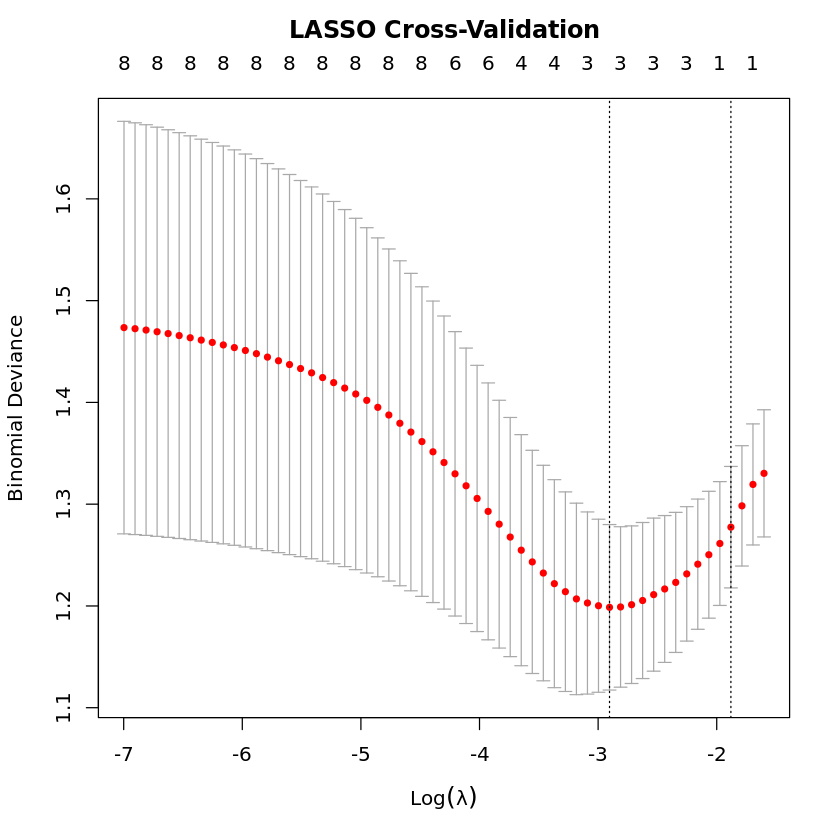

In [10]:
# Convert data frames to matrices for glmnet
X_train <- model.matrix(Outcome ~ ., d_train)[, -1]  # remove intercept
y_train <- d_train$Outcome
X_test  <- model.matrix(Outcome ~ ., d_test)[, -1]
y_test  <- d_test$Outcome

# Fit LASSO logistic regression (alpha = 1)
set.seed(123)
cv_lasso <- cv.glmnet(X_train, y_train, alpha = 1, family = "binomial")

# Plot cross-validation curve
plot(cv_lasso)
title("LASSO Cross-Validation", line = 2.5)

# Best lambda value
cv_lasso$lambda.min

# Coefficients at best lambda
coef(cv_lasso, s = "lambda.min")

# Predict on test data
lasso_pred_prob <- predict(cv_lasso, newx = X_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_prob >= 0.5)

# Performance metrics
tp <- sum(lasso_pred == 1 & y_test == 1)
fp <- sum(lasso_pred == 1 & y_test == 0)
tn <- sum(lasso_pred == 0 & y_test == 0)
fn <- sum(lasso_pred == 0 & y_test == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


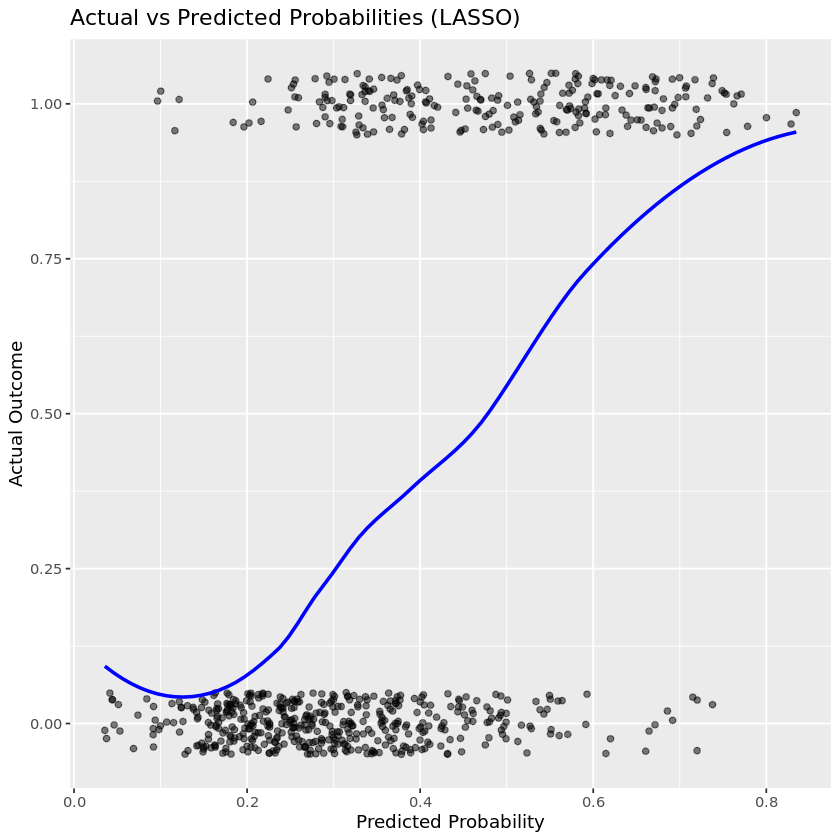

In [11]:
ggplot(data.frame(y_test, lasso_pred_prob),
       aes(x = lasso_pred_prob, y = y_test)) +
  geom_jitter(height = 0.05, alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Actual vs Predicted Probabilities (LASSO)",
       x = "Predicted Probability", y = "Actual Outcome")